In [1]:
from scipy.stats import lognorm, norm, truncnorm
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display, Javascript

def run_cell_by_index(index):
    display(Javascript(f'Jupyter.notebook.execute_cells([{index}])'))

# Start functions to:
    ## Set the trials/samples to generate input distributions and OGIP calculation.
    ## generate distributions and samples.
    ## generate distribution plots for inputs.
    ## Start function to generate scatter plots for Inputs vs OGIP.

In [2]:
V_trials = 10000
run_cell_by_index(9) # run cell that contains all functions

<IPython.core.display.Javascript object>

# Set input values to generate samples and distributions

,Stats,Rock_Volume,NTG,Porosity,Sw,Eg
count,Samples,10000.0,10000.0000,10000.0000,10000.0000,10000.0
mean,Mean,10775.5,0.4983,0.0502,0.4790,255.0
std,SD,5361.1,0.0780,0.0151,0.1191,2.9
min,Min,1504.7,0.2119,0.0101,0.2001,250.0
1%,P99,1742.3,0.3158,0.0158,0.2193,250.1
10%,P90,3342.4,0.3990,0.0308,0.3108,251.0
25%,P75,6095.9,0.4461,0.0396,0.3923,252.5
50%,P50,10808.6,0.4984,0.0501,0.4846,255.0
75%,P25,15401.6,0.5505,0.0605,0.5717,257.5
90%,P10,18211.4,0.5980,0.0697,0.6379,259.0


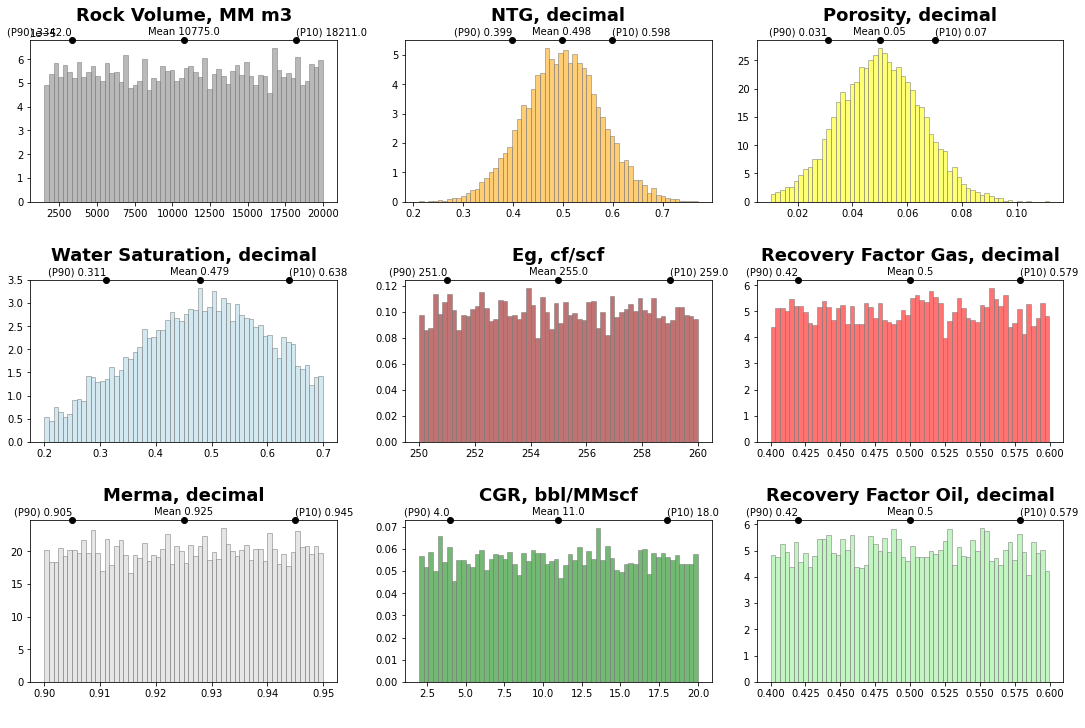

In [6]:
#Dist_Type, V_P90, V_P10, V_Low_limit, V_mode, V_High_limit, V_Constant

fig,ax= plt.subplots(nrows=3, ncols=3, figsize=(15,10), layout ='constrained')


Vrock_Samples, Vrock_Mean, Vrock_SD = GenSamples('Uniform',1500,12500,1500,1500,20000,2500)

n_row, n_col = 0, 0
Plot_distributions(Vrock_Samples, 'Rock Volume, MM m3','gray', n_row, n_col)

NTG_Samples, NTG_Mean, NTG_SD = GenSamples('Normal', 0.4, 0.6, 0,0.5,1,0.5)
n_row, n_col = 0, 1
Plot_distributions(NTG_Samples, 'NTG, decimal','orange', n_row, n_col)

Poro_Samples, Poro_Mean, Poro_SD = GenSamples('Normal', 0.03, 0.07, 0.01, 0.5, 1, 0.5)
n_row, n_col = 0, 2
Plot_distributions(Poro_Samples, 'Porosity, decimal','yellow', n_row, n_col)

Sw_Samples, Sw_Mean, Sw_SD = GenSamples('Normal', 0.3, 0.7,0.2,0.5,0.7,0.5)
n_row, n_col = 1, 0
Plot_distributions(Sw_Samples, 'Water Saturation, decimal','lightblue', n_row, n_col)

Eg_Samples, Eg_Mean, Eg_SD = GenSamples('Uniform',0,0,250,0,260,0)
n_row, n_col = 1, 1
Plot_distributions(Eg_Samples, 'Eg, cf/scf','darkred', n_row, n_col)

RFg_Samples, RFg_Mean, RFg_SD = GenSamples('Uniform',0,0,0.4,0,0.6,0)
n_row, n_col = 1, 2
Plot_distributions(RFg_Samples, 'Recovery Factor Gas, decimal','red', n_row, n_col)

Merma_Samples, Merma_Mean, Merma_SD = GenSamples('Uniform',0,0,0.9,0,0.95,0)
n_row, n_col = 2, 0
Plot_distributions(Merma_Samples, 'Merma, decimal','lightgray', n_row, n_col)

CGR_Samples, CGR_Mean, CGR_SD = GenSamples('Uniform',0,0,2,0,20,0)
n_row, n_col = 2, 1
Plot_distributions(CGR_Samples, 'CGR, bbl/MMscf','green', n_row, n_col)

RFo_Samples, RFo_Mean, RFo_SD = GenSamples('Uniform',0,0,0.4,0,0.6,0)
n_row, n_col = 2, 2
Input_df = Plot_distributions(RFo_Samples, 'Recovery Factor Oil, decimal','lightgreen', n_row, n_col)


Input_df = pd.DataFrame ({'Rock_Volume':Vrock_Samples,'NTG': NTG_Samples,'Porosity':Poro_Samples,'Sw':Sw_Samples,
                          'Eg':Eg_Samples})

# Set decimals to DF
Input_df['Rock_Volume'] = Input_df['Rock_Volume'].apply(lambda x: round(x, 2))
Input_df.Rock_Volume = Input_df.Rock_Volume.round(1)

df_test = Input_df.describe(percentiles=[0.01,0.1,.25,.75,0.9,0.99])
df_test.insert(0, 'Stats', ['Samples', 'Mean', 'SD', 'Min','P99','P90','P75','P50','P25','P10','P1','Max'])
df_test.Rock_Volume = df_test.Rock_Volume.round(1)
df_test.NTG = df_test.NTG.round(4)
df_test.Porosity = df_test.Porosity.round(4)
df_test.Sw = df_test.Sw.round(4)
df_test.Eg = df_test.Eg.round(1)

df_test

# Calculate OGIP using input samples

,Stats,OGIP_Bcf,Gas_Prod_Bcf,Gas_sale,OOIP
count,Samples,10000.0,10000.0,10000.0,10000.0
mean,Mean,1267.6,634.5,586.9,14022.6
std,SD,872.7,446.3,413.0,12726.1
min,Min,30.9,14.9,13.9,131.4
1%,P99,132.1,63.0,58.8,749.1
10%,P90,319.1,156.6,145.0,2475.8
20%,P80,489.6,242.0,223.8,3921.6
40%,P60,871.9,431.2,399.2,7651.5
50%,P50,1089.5,541.6,500.1,10056.2
60%,P40,1317.8,658.3,609.1,13172.5


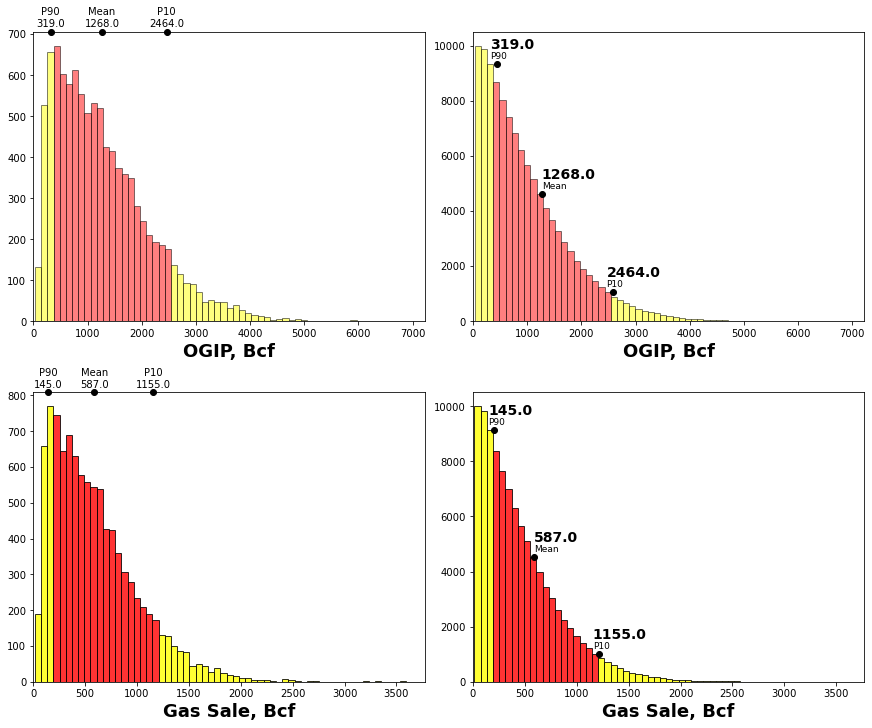

In [21]:
OGIP_arr, Gas_Prod_arr, Gas_sale_arr, OOIP_arr, Oil_Reserves_arr=[], [], [], [], []

i = 0
for x in Vrock_Samples:
    Vrock_i, NTG_i, Poro_i, Sw_i = Vrock_Samples[i], NTG_Samples[i], Poro_Samples[i], Sw_Samples[i]
    Eg_i, RFg_i, Merma_i, CGR_i, RFo_i = Eg_Samples[i], RFg_Samples[i], Merma_Samples[i], CGR_Samples[i], RFo_Samples[i]
    
    OGIP = (43560*((3.2808**3)/43560*1000000)*Vrock_i*Poro_i*NTG_i*(1-Sw_i)*Eg_i)/1000000000
    Gas_Prod, Gas_sale = OGIP * RFg_i, (OGIP * RFg_i) * Merma_i
    
    OOIP, Oil_Reserves = OGIP * CGR_i, (OGIP*CGR_i) * RFo_i
    
    OGIP_arr.append(OGIP), Gas_Prod_arr.append(Gas_Prod), Gas_sale_arr.append(Gas_sale)
    OOIP_arr.append(OOIP), Oil_Reserves_arr.append(Oil_Reserves)
    i = i +1

OGIP_df = pd.DataFrame(OGIP_arr, columns=['OGIP'])
OGIP_df = pd.DataFrame(Gas_Prod_arr, columns=['Gas_Prod'])
OGIP_df = pd.DataFrame(Gas_sale_arr, columns=['Gas_sale'])
OGIP_df = pd.DataFrame(OOIP_arr, columns=['OOIP'])
#OGIP_df = pd.DataFrame(Oil_Reserves_arr, columns=['Oil_Reserves'])

OGIP_df = pd.DataFrame ({'OGIP_Bcf':OGIP_arr,'Gas_Prod_Bcf':Gas_Prod_arr, 'Gas_sale':Gas_sale_arr, 'OOIP':OOIP_arr})

df_test = OGIP_df.describe(percentiles=[0.01,0.1,.2, .4, .6, .8,0.9,0.99])
df_test.insert(0, 'Stats', ['Samples', 'Mean', 'SD', 'Min','P99','P90','P80','P60','P50','P40','P20','P10','P1','Max'])

df_test=df_test.round(1)
display(df_test)

fig, ax2= plt.subplots(nrows = 2, ncols=2, figsize=(12,10), layout ='constrained')
Plot_OGIP(OGIP_df['OGIP_Bcf'],0,'OGIP, Bcf')
Plot_OGIP(OGIP_df['Gas_sale'],1, 'Gas Sale, Bcf')

### Generate scatter plot for all variables against OGIP
### Calculate correlation and generate tornado plot

,OGIP
Rock_Volume,0.732306
Porosity,0.436909
NTG,0.247815
Eg,0.023354
Sw,-0.332748


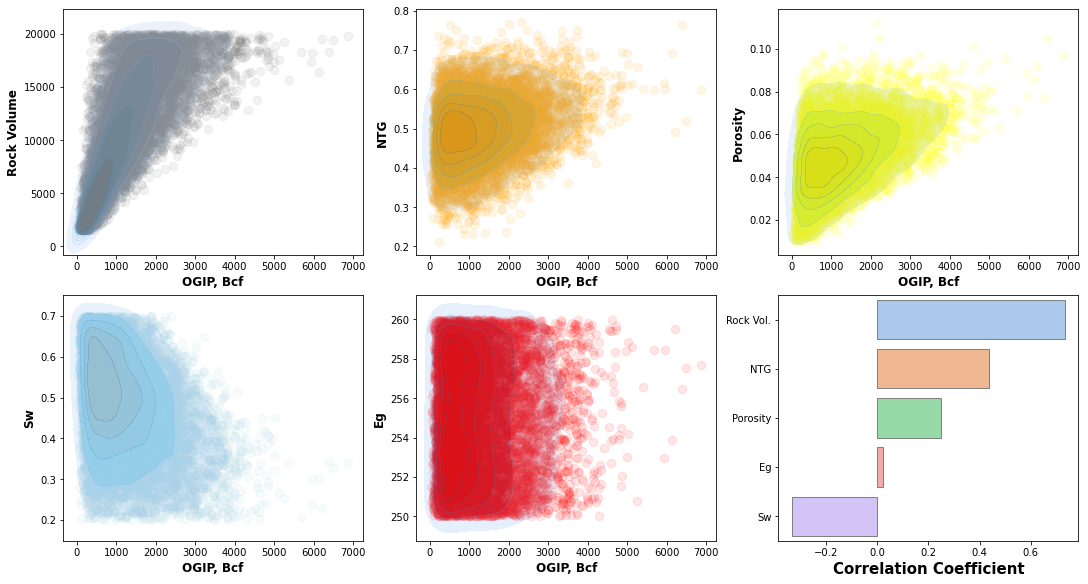

In [22]:

Input_df['OGIP'] = OGIP_df['OGIP_Bcf']
corr_DF_Coeff = Input_df.corr()
#print(corr_DF_Coeff)

## Create Plots ##
fig, axSC= plt.subplots(nrows=2, ncols=3, figsize=(15,8), layout ='constrained')

Plot_Scatter(Input_df['OGIP'],Input_df['Rock_Volume'],'Rock Volume','gray',0,0)
Plot_Scatter(Input_df['OGIP'],Input_df['NTG'],'NTG','orange',0,1)
Plot_Scatter(Input_df['OGIP'],Input_df['Porosity'],'Porosity','yellow',0,2)
Plot_Scatter(Input_df['OGIP'],Input_df['Sw'],'Sw','lightblue',1,0)
Plot_Scatter(Input_df['OGIP'],Input_df['Eg'],'Eg','red',1,1)


OGIP_Coeff = corr_DF_Coeff['OGIP']
OGIP_Coeff = OGIP_Coeff.drop('OGIP')
OGIP_Coeff.sort_values(ascending = False, axis=0,inplace=True)

OGIP_Coeff_df = pd.DataFrame(OGIP_Coeff)
display(OGIP_Coeff_df)

Input_Var_Names = ['Rock Vol.','NTG','Porosity','Eg', 'Sw']
xx,yy = 1,2
sns.barplot(y=Input_Var_Names, x=OGIP_Coeff, ax=axSC[xx,yy], orient="h", palette='pastel',edgecolor='gray');
axSC[xx,yy].set_xlabel('Correlation Coefficient', fontsize = 15,weight='bold');

In [20]:
## generate distributions and samples.
## generate distribution plots for inputs.
## Start function to generate scatter plots for Inputs vs OGIP.

def GenSamples(Dist_Type, V_P90, V_P10, V_Low_limit, V_mode, V_High_limit, V_Constant):

    if Dist_Type == 'Uniform':
        Samples_arr = np.random.uniform(low=V_Low_limit, high=V_High_limit, size=V_trials)

    if Dist_Type == 'Triangular':
        Samples_arr = np.random.triangular(left=V_Low_limit, mode=V_mode,right= V_High_limit, size=V_trials)

    if Dist_Type == 'Normal':
        x1, x2 = V_P90, V_P10 #x1, x2 = 10, 90
        p1ppf, p2ppf = norm.ppf(0.10), norm.ppf(0.90)

        Mean = ((x1 * p2ppf) - (x2 * p1ppf)) / (p2ppf - p1ppf)  #Mean
        SD = (x2 - x1) / (p2ppf - p1ppf)                         # Standard Dev

        a,b = (V_Low_limit-Mean)/SD, (V_High_limit-Mean)/SD
        Samples_arr = truncnorm.rvs(a=a,b=b, loc=Mean, scale=SD, size=V_trials)
        #NT_Samples=truncnorm.rvs((V_Low_limit-V_mu)/V_SD,(V_High_limit-V_mu)/V_SD,loc=V_mu,scale=V_SD, size=V_samples)
        
    if Dist_Type == 'Log-Normal':
        x1, x2 = np.log(V_P90), np.log(V_P10) #x1, x2 = 10, 90
        p1ppf, p2ppf = norm.ppf(0.10), norm.ppf(0.90)

        Mean = ((x1 * p2ppf) - (x2 * p1ppf)) / (p2ppf - p1ppf)   #Mean
        SD = (x2 - x1) / (p2ppf - p1ppf)                         # Standard Dev

        a,b = (V_Low_limit-Mean)/SD, (V_High_limit-Mean)/SD
        #Samples_arr = truncnorm.rvs(a=a,b=b, loc=Mean, scale=SD, size=V_trials)
        Samples_arr = lognorm(s=SD, scale=np.exp(Mean)).rvs(size=V_trials)
        
    n_Samples, n_Mean, n_SD = Samples_arr, np.mean(Samples_arr), np.std(Samples_arr)
    
    return n_Samples, n_Mean, n_SD

###########################################################
# Start function to generate distribution plots for inputs

def Plot_distributions(Samples_arr, V_Title,V_color, n_row,n_col):
    ax[n_row,n_col].hist(Samples_arr, bins=60, density=True, align='mid', color=V_color, alpha=0.55, edgecolor = "gray")
    ax[n_row,n_col].set_title(V_Title, weight='bold', fontsize = 18, pad=19)
    ax[n_row,n_col].set_xlabel(' ', fontsize = 18)
    
    y_limit = ax[n_row,n_col].get_ylim()
    ax[n_row,n_col].set_ylim(y_limit)
    
    ### Plot black dot Mean ###
    n_Mean = round(np.mean(Samples_arr),3)
    if n_Mean > 1:
        n_Mean = round(n_Mean,0)
        
    n_txt = 'Mean ' + str(n_Mean)
    ax[n_row,n_col].annotate(n_txt, xy=(n_Mean,y_limit[1]), xycoords='data', xytext=(0,5), textcoords='offset points',
                             horizontalalignment='center')
    
    ax[n_row,n_col].scatter(n_Mean, y_limit[1], clip_on=False,color='black') 
    
    ### Plot black dot P90 ###
    pn = round(np.percentile(Samples_arr, 10),3)
    if pn > 1:
        pn = round(pn,0)
        
    n_txt = '(P90) ' + str(pn)
    ax[n_row,n_col].annotate(n_txt, xy=(pn,y_limit[1]), xycoords='data', xytext=(0,5), textcoords='offset points',
                            horizontalalignment='right')
    
    ax[n_row,n_col].scatter(pn, y_limit[1], clip_on=False,color='black') 
    
    ### Plot black dot P10 ###
    pn = round(np.percentile(Samples_arr, 90),3)
    if pn > 1:
        pn = round(pn,0)
        
    n_txt = '(P10) ' +str(pn)
    ax[n_row,n_col].annotate(n_txt, xy=(pn,y_limit[1]), xycoords='data', xytext=(0,5), textcoords='offset points',
                            horizontalalignment='left')
    
    ax[n_row,n_col].scatter(pn, y_limit[1], clip_on=False,color='black')
    
    
    
# Start function to generate scatter plots for Inputs vs OGIP
def Plot_Scatter(X_sample,Y_sample, y_text,V_color, xx,yy):
    axSC[xx,yy].scatter(x=X_sample, y=Y_sample, color=V_color, alpha=0.1, s = 70)
    axSC[xx,yy].set_xlabel('OGIP, Bcf', size=12, weight='bold')
    axSC[xx,yy].set_ylabel(y_text, size=12, weight='bold')
    
    sns.kdeplot(x=X_sample, y=Y_sample, levels=6, fill=True, alpha=0.2, cut=2, ax=axSC[xx,yy], 
                    label='---');

    
    
def Plot_OGIP(OGIP_Samples,r_chart, x_Label):
    if r_chart == 0:
        alp = 0.5
    else:
        alp = 0.8
    N, bins, patches = ax2[r_chart,0].hist(OGIP_Samples, bins=60, edgecolor='black', linewidth=1, color='red',alpha=alp)
    
    # facecolor for each bar
    pn90 = round(np.percentile(OGIP_Samples, 10),3)
    pn10 = round(np.percentile(OGIP_Samples, 90),3)
    for i in range(len(N)):
        if (bins[i] < pn90) or (bins[i]>=pn10):
           patches[i].set_facecolor('yellow')

    ax2[r_chart,0].set_xlim(left=0)
    ax2[r_chart,0].set_xlabel(x_Label, fontsize = 18,weight='bold');

    y_limit = ax2[r_chart,0].get_ylim()
    ax2[r_chart,0].set_ylim(y_limit)

    ### Plot black dot Mean ###
    n_Mean = round(np.mean(OGIP_Samples),3)
    if n_Mean > 1:
        n_Mean = round(n_Mean,0)
        
    n_txt = str(n_Mean)
    ax2[r_chart,0].annotate(n_txt, xy=(n_Mean,y_limit[1]), xycoords='data', xytext=(0,5), textcoords='offset points',
                             horizontalalignment='center')

    ax2[r_chart,0].annotate('Mean', xy=(n_Mean,y_limit[1]), xycoords='data', xytext=(0,17), textcoords='offset points',
                             horizontalalignment='center')
        
    ax2[r_chart,0].scatter(n_Mean, y_limit[1], clip_on=False,color='black')


    ### Plot black dot P90 ###
    pn = round(np.percentile(OGIP_Samples, 10),3)
    if pn > 1:
        pn = round(pn,0)
        
    n_txt = str(pn)
    ax2[r_chart,0].annotate(n_txt, xy=(pn,y_limit[1]), xycoords='data', xytext=(0,5), textcoords='offset points',
                            horizontalalignment='center')

    ax2[r_chart,0].annotate('P90', xy=(pn,y_limit[1]), xycoords='data', xytext=(0,17), textcoords='offset points',
                            horizontalalignment='center')
        
    ax2[r_chart,0].scatter(pn, y_limit[1], clip_on=False,color='black') 
    
    ### Plot black dot P10 ###
    pn = round(np.percentile(OGIP_Samples, 90),3)
    max_val = np.max(OGIP_Samples)

    if pn > 1:
        pn = round(pn,0)
        
    n_txt = str(pn)
    ax2[r_chart,0].annotate(n_txt, xy=(pn,y_limit[1]), xycoords='data', xytext=(0,5), textcoords='offset points',
                            horizontalalignment='center')
    n_txt = 'P10'
    ax2[r_chart,0].annotate(n_txt, xy=(pn,y_limit[1]), xycoords='data', xytext=(0,17), textcoords='offset points',
                            horizontalalignment='center')
        
    x_val = pn
    y_val = y_limit[1]
    ax2[r_chart,0].scatter(x_val, y_val, clip_on=False,color='black')
    
    
    
    #########################################################
    # Cumulative Plot
    Nc, binsc, patchesc = ax2[r_chart,1].hist(OGIP_Samples,cumulative=-1, bins=60, edgecolor='black', linewidth=1, 
                                   color='red',alpha=alp)
    axx2 = ax2[r_chart,1]
    # facecolor for each bar
    pn90, pn10 = round(np.percentile(OGIP_Samples, 10),3), round(np.percentile(OGIP_Samples, 90),3)
    max_ogip = np.max(binsc)
    
    for i in range(len(Nc)):
        if (binsc[i] < pn90) or (binsc[i]>=pn10):
           patchesc[i].set_facecolor('yellow')
        
        if binsc[i]<n_Mean:
            y_limit_M=Nc[i]

        if binsc[i]<pn90:
            y_limit_P90=Nc[i]

        if binsc[i]<pn10:
            y_limit_P10=Nc[i]
    
    axx2.set_xlim(left=0)
    axx2.set_xlabel(x_Label, fontsize = 18,weight='bold');
    
    dx = max_ogip/60
    x_vals, y_vals = [n_Mean, pn90+dx, pn10+dx], [y_limit_M,y_limit_P90,y_limit_P10]
    
    axx2.scatter(x_vals, y_vals, clip_on=False,color='black') # add dots for Mean, P90 and P10
    
    # P10 Annotations on plot
    Add_annotations('P10',pn10, y_limit_P10, dx,axx2)
    Add_annotations('Mean',n_Mean, y_limit_M, dx,axx2)
    Add_annotations('P90',pn90, y_limit_P90, dx,axx2)
    

def Add_annotations(n_txt,x_val,y_val,dx,axx2):
    xx_val,yy_val = x_val+(dx*0), y_val
    axx2.annotate(n_txt, xy=(xx_val,yy_val), xycoords='data', xytext=(0,5), textcoords='offset pixels',
                  horizontalalignment='left', fontsize=9)
    
    n_txt,xx_val, yy_val = str(round(x_val,0)), x_val+(dx*0), y_val
    axx2.annotate(n_txt, xy=(xx_val,yy_val), xycoords='data', xytext=(0,15), textcoords='offset pixels',
                  horizontalalignment='left', fontsize=14, weight='bold')
    

# Interactive controls widgets to generate input distributions
# Work in progress

In [ ]:
#Dist_Type, V_P90, V_P10, V_Low_limit, V_mode, V_High_limit, V_Constant
def Samples_Plots(min_val,max_val):
    min_val = float(min_val)
    min_val = Min_Rock_vol.value
    fig,ax2= plt.subplots(nrows=3, ncols=3, figsize=(15,10), layout ='constrained')


    Vrock_Samples, Vrock_Mean, Vrock_SD = GenSamples('Uniform',1500,12500,min_val,1500,max_val,2500)

    n_row, n_col = 0, 0
    #Plot_distributions(Vrock_Samples, 'Rock Volume, MM m3','gray', n_row, n_col)
    ax2[n_row,n_col].hist(Vrock_Samples, bins=60, density=True, align='mid', color="green", alpha=0.55, edgecolor = "gray")
    print(len(Vrock_Samples))

In [ ]:
Min_val = widgets.FloatSlider(value=100, min=0, max=100000, step=100)
Max_val = widgets.FloatSlider(value=10000, min=0, max=100000, step=100)
Min_Rock_vol = widgets.Text(value='100', placeholder='Type something',description='Min:',disabled=False)

button = widgets.Button(description='Click me',disabled=False,button_style='', tooltip='Click me', icon='check')
button.on_click(Samples_Plots)

In [ ]:
display(Min_Rock_vol)
display(button)

#interact(Samples_Plots, min_val=Min_Rock_vol, max_val=Max_val, c=button)

